In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score

df = pd.read_csv('SNA.csv')

X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

min_val = X_train.min()
if min_val < 0:
    X_train_multinomial = X_train - min_val
    X_test_multinomial = X_test - min_val
else:
    X_train_multinomial = X_train
    X_test_multinomial = X_test

multinomial_classifier = MultinomialNB()
multinomial_classifier.fit(X_train_multinomial, y_train)
y_pred_multinomial = multinomial_classifier.predict(X_test_multinomial)
print("Multinomial Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_multinomial))
print("Multinomial Naïve Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_multinomial), "\n\n")

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0 



Naïve Bayes Accuracy: 0.9
Naïve Bayes Confusion Matrix:
 [[65  3]
 [ 7 25]] 



Random Forest Accuracy: 0.92
Random Forest Confusion Matrix:
 [[63  5]
 [ 3 29]] 



SVM Accuracy: 0.93
SVM Confusion Matrix:
 [[64  4]
 [ 3 29]]


    Outlook Temperature Humidity    Wind Play Tennis
0     Sunny         Hot     High    Weak          No
1     Sunny         Hot     High  Strong          No
2  Overcast         Hot     High    Weak         Yes
3      Rain        Mild     High    Weak         Yes
4      Rain        Cool   Normal    Weak         Yes
Confusion Matrix:
[[1 0]
 [0 2]]

Accuracy Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Actual vs Predicted States:
  Actual Predicted
0    Yes       Yes
1    Yes       Yes
2     No        No


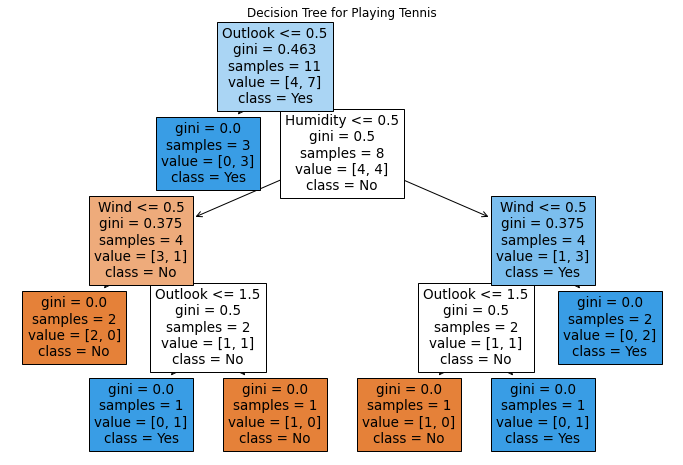


Based on the input, the model predicts: Will Play Tennis? Yes


/opt/anaconda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [13]:
#Q2

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt


data = pd.read_csv('PlayTennis.csv')


print(data.head())


label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le


X = data[['Outlook', 'Temperature', 'Humidity', 'Wind']] 
y = data['Play Tennis'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


predicted_states_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})


predicted_states_df['Actual'] = predicted_states_df['Actual'].map({0: 'No', 1: 'Yes'})
predicted_states_df['Predicted'] = predicted_states_df['Predicted'].map({0: 'No', 1: 'Yes'})

print("\nActual vs Predicted States:")
print(predicted_states_df.reset_index(drop=True))


plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree for Playing Tennis')
plt.show()


sample_input = [[0, 1, 0, 1]]  
prediction = model.predict(sample_input)


play_decision = 'Yes' if prediction[0] == 1 else 'No'
print(f"\nBased on the input, the model predicts: Will Play Tennis? {play_decision}")

In [4]:
#Q3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


data = pd.read_csv('SNA.csv')


data = data.drop(['User ID'], axis=1)


data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})


X = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


k = 5  
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[48  4]
 [ 2 26]]

Accuracy Score: 0.925

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



Confusion Matrix:
[[53  1]
 [ 0 13]]

Accuracy Score: 0.9850746268656716

Precision Score: 0.9285714285714286

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.93      1.00      0.96        13

    accuracy                           0.99        67
   macro avg       0.96      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



/home/fymsc37/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


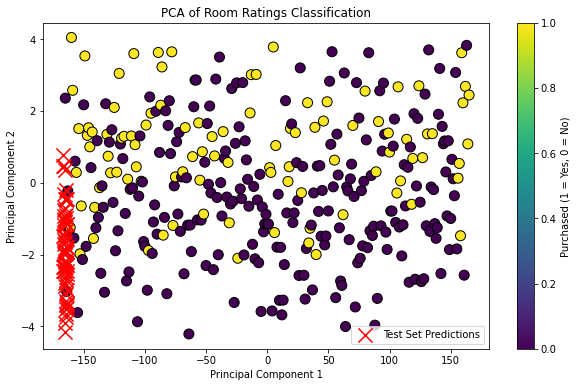

Buy SUV
YES


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score
from sklearn.decomposition import PCA


data = pd.read_csv('user_data.csv')


data = data.drop(['Unnamed: 0', 'user_id', 'room_id'], axis=1)
data['Purchased'] = (data['average_rating'] > 3.0).astype(int)


X = data.drop(['average_rating', 'Purchased'], axis=1)
y = data['Purchased']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy)


precision = precision_score(y_test, y_pred)
print("\nPrecision Score:", precision)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA of Room Ratings Classification')
output = "YES"
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Purchased (1 = Yes, 0 = No)')


X_test_pca = pca.transform(X_test)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c='red', marker='x', s=200, label='Test Set Predictions')

plt.legend()
plt.show()
print("Buy SUV")
print(output)